<a href="https://colab.research.google.com/github/MANOJ-S-NEGI/TENSORFLOW/blob/main/CNN_Binary_and_Multi_label_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convolution neuron networking:1

## Binary Image_classification:

#### Data Discription:
The model is prepared for the binary image classification for the dataset belong to two classes of mountain and  forest.




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tensorflow
import numpy as np
import pandas as pd
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tensorflow
import os
import matplotlib.image as mpimg
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator


### Walk through forest_building(forbuild) directory and list number of files

In [ ]:
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/forbuild"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 2 images in '/content/drive/MyDrive/forbuild'.
There are 2 directories and 0 images in '/content/drive/MyDrive/forbuild/train'.
There are 0 directories and 2271 images in '/content/drive/MyDrive/forbuild/train/forest'.
There are 0 directories and 2191 images in '/content/drive/MyDrive/forbuild/train/buildings'.
There are 2 directories and 0 images in '/content/drive/MyDrive/forbuild/test'.
There are 0 directories and 437 images in '/content/drive/MyDrive/forbuild/test/buildings'.
There are 0 directories and 474 images in '/content/drive/MyDrive/forbuild/test/forest'.
There are 0 directories and 0 images in '/content/drive/MyDrive/forbuild/.ipynb_checkpoints'.


In [ ]:
# Another way to find out how many images are in a file
num_building_images_train = len(os.listdir("/content/drive/MyDrive/forbuild/train/buildings"))

# Another way to find out how many images are in a file
num_forest_images_train = len(os.listdir("/content/drive/MyDrive/forbuild/train/forest"))

num_forest_images_train,num_building_images_train

(2271, 2191)

### Get the class names (programmatically, this is much more helpful with a longer list of classes)

In [ ]:
data_dir = pathlib.Path("/content/drive/MyDrive/forbuild/train") # turn our training path into a Python path

class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['buildings' 'forest']


### View an image

In [ ]:
def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (150, 150, 3)


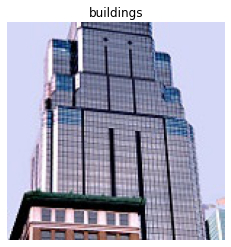

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="/content/drive/MyDrive/forbuild/train/",
                        target_class="buildings")

In [ ]:
tensorflow.argmax(img[0]),tensorflow.argmin(img[0])

(<tf.Tensor: shape=(3,), dtype=int64, numpy=array([50, 48, 36])>,
 <tf.Tensor: shape=(3,), dtype=int64, numpy=array([51, 51, 51])>)

In [ ]:
# normalising the image and lookinto the data:
img[0]/225.,img[0]

(array([[0.94666667, 0.96      , 1.09777778],
        [0.94666667, 0.96      , 1.09777778],
        [0.94666667, 0.96      , 1.09777778],
        [0.94666667, 0.96      , 1.09777778],
        [0.94666667, 0.96      , 1.09777778],
        [0.94666667, 0.96      , 1.09777778],
        [0.94666667, 0.96      , 1.09777778],
        [0.94666667, 0.96      , 1.09777778],
        [0.94666667, 0.96      , 1.09777778],
        [0.94666667, 0.96      , 1.09777778],
        [0.94666667, 0.96      , 1.09777778],
        [0.94666667, 0.96      , 1.09777778],
        [0.94666667, 0.96      , 1.09777778],
        [0.94666667, 0.96      , 1.09777778],
        [0.94666667, 0.96      , 1.09777778],
        [0.94666667, 0.96      , 1.09777778],
        [0.94222222, 0.96444444, 1.10666667],
        [0.94666667, 0.96      , 1.10666667],
        [0.94666667, 0.96      , 1.09777778],
        [0.94666667, 0.96      , 1.09777778],
        [0.94666667, 0.96444444, 1.09333333],
        [0.94666667, 0.96444444, 1

### working on the dataSet:

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
import tensorflow as tf
train_dir=("/content/drive/MyDrive/forbuild/train")
test_dir =("/content/drive/MyDrive/forbuild/test")

#### Create train and test data generators and rescale the data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

### Turn it into batches

In [ ]:
train_data = train_datagen.flow_from_directory(train_dir,
                                                  target_size=(150, 150),
                                                     batch_size=32,
                                                        class_mode='binary',
                                                            shuffle=True) # Shuffle data (default)

valid_data = test_datagen.flow_from_directory(directory=test_dir,
                                                 target_size=(150, 150),
                                                        class_mode='binary',
                                                            batch_size=32)

Found 4462 images belonging to 2 classes.
Found 911 images belonging to 2 classes.


In [ ]:
images,labels=train_data.next()

### Creating the model, compiling it and fitting the model

In [ ]:

model_1 = tf.keras.models.Sequential([
                                      
                         tf.keras.layers.Conv2D(filters=10, 
                                                 kernel_size=3, 
                                                     activation="relu", 
                                                        input_shape=(150, 150, 3)), 
                        
                         tf.keras.layers.Conv2D(10, 3, activation="relu"),
                         tf.keras.layers.MaxPool2D(pool_size=2,
                                                         padding="valid"), # padding can also be 'same' if req
                         
                         tf.keras.layers.Conv2D(10, 3, activation="relu"),
                         
                         tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
                         
                         tf.keras.layers.MaxPool2D(2),
                         
                         tf.keras.layers.Flatten(),
                         
                         tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output 
                         ])

# Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
140/140 [==============================] - 756s 5s/step - loss: 0.3279 - accuracy: 0.8530 - val_loss: 0.2106 - val_accuracy: 0.9232
Epoch 2/5
140/140 [==============================] - 17s 121ms/step - loss: 0.1828 - accuracy: 0.9330 - val_loss: 0.1848 - val_accuracy: 0.9286
Epoch 3/5
140/140 [==============================] - 13s 93ms/step - loss: 0.1397 - accuracy: 0.9509 - val_loss: 0.1302 - val_accuracy: 0.9583
Epoch 4/5
140/140 [==============================] - 13s 93ms/step - loss: 0.1086 - accuracy: 0.9630 - val_loss: 0.1081 - val_accuracy: 0.9649
Epoch 5/5
140/140 [==============================] - 13s 94ms/step - loss: 0.0928 - accuracy: 0.9675 - val_loss: 0.1060 - val_accuracy: 0.9627


### plotting the loss_curve:

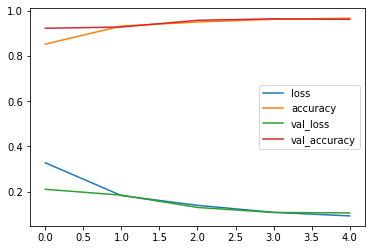

In [ ]:
pd.DataFrame(history_1.history).plot()

### optional- loss_curve with separate graphs

In [ ]:
def loss_curve(history):
    loss=history.history['loss']
    accuracy=history.history['accuracy']
    val_accuracy=history.history['val_accuracy']
    val_loss=history.history['val_loss']
    #epochs=range(len(history_1.history['loss'])) # times the epoch range(5)in this case len(history_1.history) >>5
    
    ## plot graphs:

    plt.plot(loss,label='training_loss')
    plt.plot(val_loss,label='validation_loss')
    plt.title('Loss')
    plt.ylabel('Epochs')
    plt.xlabel("Loss")
    plt.legend()
    plt.figure()
    plt.plot(accuracy,label='training_accuracy')
    plt.plot(val_accuracy,label='validation_accuracy')
    plt.title('Accuracy')
    plt.ylabel('Epochs')
    plt.xlabel("Accuracy")
    plt.legend()


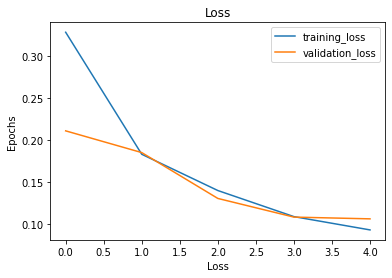

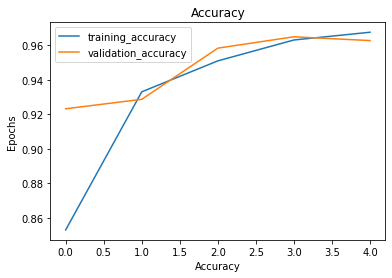

In [ ]:
loss_curve(history_1)

### evaluating the model_1

In [ ]:
model_1.evaluate(valid_data)

29/29 [==============================] - 2s 67ms/step - loss: 0.1060 - accuracy: 0.9627


[0.1059848889708519, 0.9626783728599548]

### model_1 summary:

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 10)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 10)        910       
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 10)        910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 34, 34, 10)       0         
 2D)                                                    

### saving the data:

In [ ]:
model_1.save("/content/drive/MyDrive/forbuild/save_binary_image_classification_model")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/forbuild/save_binary_image_classification_model/assets


###Making a prediction with our trained model

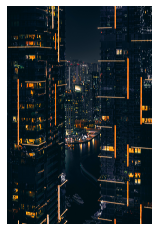

In [ ]:
## optional -just checking the downloaded images:
build1 = mpimg.imread("/pexels-philipp-birmes-830891.jpg")
#build2=mpimg.imread('/content/pexels-aleksandar-pasaric-2603464.jpg')
plt.imshow(build1)
#plt.imshow(build2)
plt.axis(False);

In [ ]:
# checking the predictions:
def load_pred_image(filename, img_size=150):
    #reading the image:
    img=  tf.io.read_file(filename)
    img = tf.io.read_file(filename)
    # decoding the inage:
    img=  tf.image.decode_image(img, channels=3)
    #resizeing the image
    img=  tf.image.resize(img ,size=[img_size,img_size])
    ## normalizing the image:
    img=img/255.

    return img

In [ ]:
build=load_pred_image(filename="pexels-pixabay-162031.jpg")
build

<tf.Tensor: shape=(150, 150, 3), dtype=float32, numpy=
array([[[0.34607843, 0.50686276, 0.7147059 ],
        [0.35490197, 0.5294118 , 0.7264706 ],
        [0.36209148, 0.5189542 , 0.7228758 ],
        ...,
        [0.05686322, 0.14215711, 0.27581763],
        [0.05882353, 0.14901961, 0.27058825],
        [0.07548876, 0.15392013, 0.28725347]],

       [[0.3254902 , 0.49019608, 0.7       ],
        [0.35392156, 0.5147059 , 0.7264706 ],
        [0.35490197, 0.5117647 , 0.7124183 ],
        ...,
        [0.05816961, 0.14836569, 0.2718951 ],
        [0.05392157, 0.13137256, 0.26078433],
        [0.04510091, 0.12745385, 0.24902248]],

       [[0.37320262, 0.5320261 , 0.73594767],
        [0.3764706 , 0.5392157 , 0.7392157 ],
        [0.34869283, 0.5045752 , 0.70490193],
        ...,
        [0.06143727, 0.13594708, 0.26143727],
        [0.05882353, 0.13627452, 0.26568627],
        [0.05653387, 0.13496524, 0.264377  ]],

       ...,

       [[0.0882353 , 0.49477127, 0.40751636],
        [0.05

In [ ]:
## checking data:
# adding extra dimention to building test images
building_test=tf.expand_dims(build,axis=0)
# predicting the building _test images
pred=model_1.predict(building_test)
pred


array([[0.0186717]], dtype=float32)

In [ ]:
class_names[int(tf.round(pred))]## checking 

'buildings'

In [ ]:
def plot_test(filename):
    img=load_pred_image(filename)
    pred=model_1.predict(tf.expand_dims(img,axis=0))
    pred_label=class_names[int(tf.round(pred))]

    plt.imshow(img)
    plt.title(pred_label)
    plt.axis(False)
    


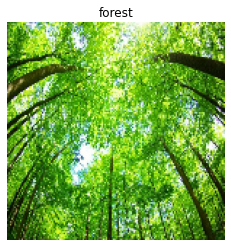

In [ ]:
plot_test(filename="/content/800px_COLOURBOX4630197.jpg")

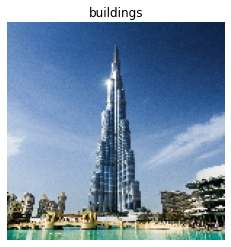

In [ ]:
plot_test(filename="/content/pexels-pixabay-162031.jpg")

## Working this multiclass data:

Data Discription:multi class image classification with images of 
('buildings', 'forest', 'glacier', 'mountain', 'sea', 'street')

In [ ]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import pathlib
import numpy as np
import random
import os
import matplotlib.image as mpimg
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### checking:walkthrough over dirctory and insides:

In [ ]:
loc="/content/drive/MyDrive/archive"
for dirpath,dirname,filename in os.walk(loc):
    print(f'{dirpath} name of directory {dirname} file{filename}')

/content/drive/MyDrive/archive name of directory ['seg_train', 'seg_test', 'save model_2 for multilabel image_classifications', '.ipynb_checkpoints', 'seg_pred'] file[]
/content/drive/MyDrive/archive/seg_train name of directory ['seg_train'] file[]
/content/drive/MyDrive/archive/seg_train/seg_train name of directory ['sea', 'buildings', 'glacier', 'forest', 'mountain', 'street'] file[]
/content/drive/MyDrive/archive/seg_train/seg_train/sea name of directory [] file['2415.jpg', '2484.jpg', '2508.jpg', '2384.jpg', '2529.jpg', '239.jpg', '2460.jpg', '2548.jpg', '2547.jpg', '2475.jpg', '2546.jpg', '2394.jpg', '2544.jpg', '2596.jpg', '2377.jpg', '2616.jpg', '2462.jpg', '2456.jpg', '253.jpg', '2598.jpg', '2371.jpg', '2515.jpg', '2555.jpg', '2365.jpg', '2451.jpg', '2589.jpg', '2439.jpg', '2407.jpg', '2489.jpg', '261.jpg', '2594.jpg', '2566.jpg', '2391.jpg', '2461.jpg', '248.jpg', '2409.jpg', '2486.jpg', '2516.jpg', '2550.jpg', '2619.jpg', '2869.jpg', '2693.jpg', '290.jpg', '2856.jpg', '2656.j

### creating the datapaths:

In [ ]:
train_dir="/content/drive/MyDrive/archive/seg_train/seg_train/"
test_dir ="/content/drive/MyDrive/archive/seg_test/seg_test"

In [ ]:
import pathlib
data_dir= pathlib.Path(train_dir)
class_label=np.array(sorted([item.name for item in data_dir.glob("*")]))
class_label

array(['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'],
      dtype='<U9')

### View an image

In [ ]:
def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), len(class_label))

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image
  return img

Image shape: (150, 150, 3)


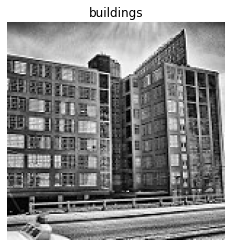

In [ ]:
random_images = random.sample(os.listdir(train_dir), len(class_label))# optional -we can check by using simpily target_dir="path" and target_class='label'

for i in range(len(class_label)):
    label=random_images[i]


# View a random image from the training dataset
img = view_random_image(target_dir=train_dir,
                        target_class=label)

## Customising the Data

In [ ]:
from tensorflow.python.keras.backend import categorical_crossentropy
from keras_preprocessing.image import image_data_generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

train_data=train_datagen.flow_from_directory(train_dir,
                                            shuffle=True,
                                           target_size=(150,150),
                                           class_mode='categorical',
                                           batch_size=32)
test_data=test_datagen.flow_from_directory(test_dir,
                                           shuffle=True,
                                           target_size=(150,150),
                                           class_mode='categorical',
                                           batch_size=32)

Found 13489 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


### Creating the model_2:

In [ ]:
from tensorflow.python.ops.gen_array_ops import concat_v2_eager_fallback
## creating the model
import tensorflow as tf
from tensorflow.keras.layers import MaxPool2D,Conv2D,Dense,Flatten

model_2= tf.keras.Sequential([
                              Conv2D(32,6,activation="relu",input_shape=(150, 150, 3)),
                              Conv2D(32,6,activation="relu"),
                              MaxPool2D(2),

                              Conv2D(32,6,activation="relu"),
                              Conv2D(32,6,activation="relu"),
                              MaxPool2D(2),

                              Conv2D(32,6,activation="relu"),
                              Conv2D(32,6,activation="relu"),
                              
                              Flatten(),
                             
                              Dense(6,activation="softmax")
])


```
model_2 troubleshoot: with input_size and layering.
>> simply just check though summary and increase the o/p layer filter/units or follow the error message check expected logit_size[]

```

### Summary of model_2

In [ ]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 145, 145, 32)      3488      
                                                                 
 conv2d_1 (Conv2D)           (None, 140, 140, 32)      36896     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 70, 70, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 65, 65, 32)        36896     
                                                                 
 conv2d_3 (Conv2D)           (None, 60, 60, 32)        36896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                    

### Fitting the Model_2

In [ ]:
model_2.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

##fitting the model_2
history_2=model_2.fit(train_data,
                        epochs=6,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/6
422/422 [==============================] - 3798s 9s/step - loss: 1.1860 - accuracy: 0.5152 - val_loss: 1.0720 - val_accuracy: 0.5317
Epoch 2/6
422/422 [==============================] - 3185s 8s/step - loss: 0.9162 - accuracy: 0.6315 - val_loss: 0.8108 - val_accuracy: 0.6800
Epoch 3/6
422/422 [==============================] - 3199s 8s/step - loss: 0.7747 - accuracy: 0.7001 - val_loss: 0.9289 - val_accuracy: 0.6523
Epoch 4/6
422/422 [==============================] - 3226s 8s/step - loss: 0.7322 - accuracy: 0.7213 - val_loss: 0.7973 - val_accuracy: 0.6913
Epoch 5/6
422/422 [==============================] - 3235s 8s/step - loss: 0.6488 - accuracy: 0.7591 - val_loss: 0.6295 - val_accuracy: 0.7743
Epoch 6/6
422/422 [==============================] - 3225s 8s/step - loss: 0.6191 - accuracy: 0.7709 - val_loss: 0.6280 - val_accuracy: 0.7780


Epoch 1/6

* 422/422 [==============================] - 3798s 9s/step - loss: 1.1860 - accuracy: 0.5152 - val_loss: 1.0720 - val_accuracy: 0.5317
* Epoch 2/6
422/422 [==============================] - 3185s 8s/step - loss: 0.9162 - accuracy: 0.6315 - val_loss: 0.8108 - val_accuracy: 0.6800
* Epoch 3/6
422/422 [==============================] - 3199s 8s/step - loss: 0.7747 - accuracy: 0.7001 - val_loss: 0.9289 - val_accuracy: 0.6523
* Epoch 4/6
422/422 [==============================] - 3226s 8s/step - loss: 0.7322 - accuracy: 0.7213 - val_loss: 0.7973 - val_accuracy: 0.6913
* Epoch 5/6
422/422 [==============================] - 3235s 8s/step - loss: 0.6488 - accuracy: 0.7591 - val_loss: 0.6295 - val_accuracy: 0.7743
* Epoch 6/6
422/422 [==============================] - 3225s 8s/step - loss: 0.6191 - accuracy: 0.7709 - val_loss: 0.6280 - val_accuracy: 0.7780

### Saving and Plotting the Model:

In [ ]:
model_2.save('save model_2 for multilabel image_classifications')

In [ ]:
def plot_curve(history):
    loss= history.history['loss']
    accuracy=history.history['accuracy']
    val_accuracy=history.history['val_accuracy']
    val_loss=history.history['val_loss']
    #epochs=range(len(history_2.history['loss'])) # times the epoch range(6)in this case len(history_2.history) >>6
    
    ## plot graphs:
    plt.plot(loss,label='training_loss')
    plt.plot(val_loss,label='validation_loss')
    plt.title('loss')
    plt.ylabel('Epoch')
    plt.xlabel('Loss')
    plt.figure()
    plt.plot(accuracy,label='Accuracy')
    plt.plot(val_accuracy,label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Accuracy')
    plt.ylabel('Epoch') 
    plt.legend()

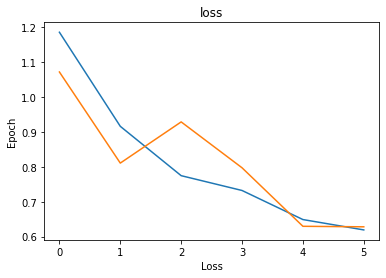

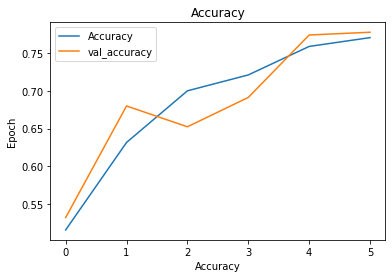

In [ ]:
plot_curve(history_2)

### Evaluating the model:

In [ ]:
model=tf.keras.models.load_model("/content/drive/MyDrive/archive/save model_2 for multilabel image_classifications")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 145, 145, 32)      3488      
                                                                 
 conv2d_1 (Conv2D)           (None, 140, 140, 32)      36896     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 70, 70, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 65, 65, 32)        36896     
                                                                 
 conv2d_3 (Conv2D)           (None, 60, 60, 32)        36896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                    

In [ ]:
model.evaluate(test_data)

KeyboardInterrupt: ignored

### Testing the Predictions:


In [ ]:
# Another way to find out how many images are in a file
seg_pred= len(os.listdir("/content/drive/MyDrive/archive/seg_pred"))
seg_pred

7301

In [ ]:
# checking the predictions:
def load_pred_data(filename,img_size=150):
    img=tf.io.read_file(filename)
    img=tf.image.decode_image(img,channels=3)
    img=tf.image.resize(img,size=[img_size,img_size])
    img=img/255
    return img    

In [ ]:
def plot_pred(filename):
    #calling the shapeed decoded image 
    img=load_pred_data(filename)
    # creating th extra dimesnsion
    exd_img=tf.expand_dims(img,axis=0)
    #predicting the extended axis image:
    pred=model.predict(exd_img)
    # chossing the hiest probability
    pred=np.argmax(pred)
    ##predicted the class_label
    pred=class_label[pred]
    

    plt.imshow(img)
    plt.title(pred)
    plt.axis(False)

## Class label
* buildings
* forest
* glacier
* mountain
* sea
* street

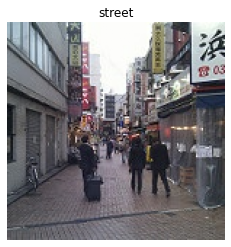

In [ ]:
seg_pred_dir="/content/drive/MyDrive/archive/seg_pred/"
import random
import os
random_filename = random.choice([ x for x in os.listdir(seg_pred_dir)
                   if os.path.isfile(os.path.join(seg_pred_dir, x))
])
pred_image=seg_pred_dir+random_filename




plot_pred(filename= pred_image)